In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import arch
from arch import arch_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from pmdarima import auto_arima
import RoughVol

ModuleNotFoundError: No module named 'RoughVol'

# Read the gold data


In [2]:
df = pd.read_csv("GOLD.csv")
x = df["Adj Close"]
Daily_return = [0]*(len(x))
for i in range(len(x)-1):
    Daily_return[i+1] = x[i + 1]/x[i] -1
df['Daily return'] = Daily_return
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily return
0,2022-09-20,15.230000,15.230000,14.850000,15.050000,14.633915,25211100,0.000000
1,2022-09-21,15.140000,15.520000,14.900000,15.180000,14.760323,26828500,0.008638
2,2022-09-22,15.270000,15.460000,15.010000,15.070000,14.653362,18804200,-0.007247
3,2022-09-23,14.740000,14.750000,14.260000,14.480000,14.079674,25092200,-0.039151
4,2022-09-26,14.330000,14.520000,13.970000,14.190000,13.797691,22121700,-0.020028
...,...,...,...,...,...,...,...,...
246,2023-09-13,16.049999,16.139999,15.960000,16.120001,16.120001,9928300,0.004361
247,2023-09-14,16.190001,16.430000,16.139999,16.330000,16.330000,12856100,0.013027
248,2023-09-15,16.400000,16.690001,16.379999,16.639999,16.639999,17842400,0.018983
249,2023-09-18,16.709999,16.790001,16.570000,16.680000,16.680000,9470100,0.002404


# Apply GARCH model to calculate the daily volatility

Text(0, 0.5, 'Daily return')

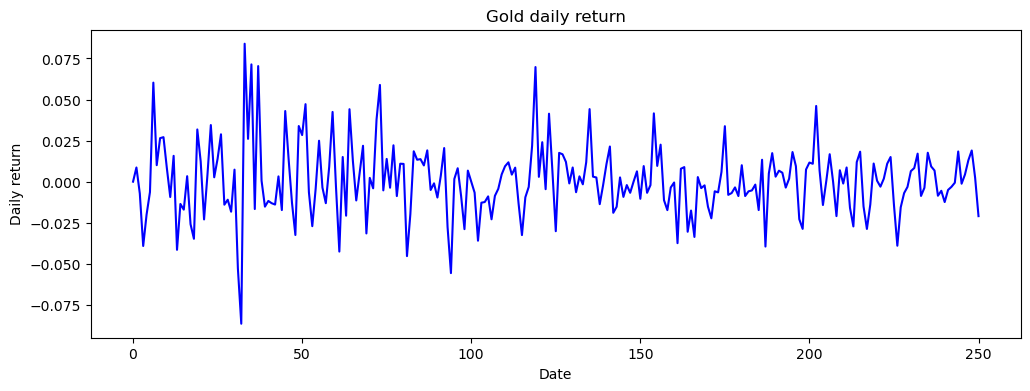

In [15]:
x = df["Date"]
# log difference
log_doffernece_return = 
for i in range(df["Daily return"]):
    
    
plt.figure(figsize=(12, 4))
plt.plot(y,color="b")
plt.title("Gold daily return")
plt.xlabel("Date")
plt.ylabel("Daily return")

Text(0, 0.5, 'Differnece of return')

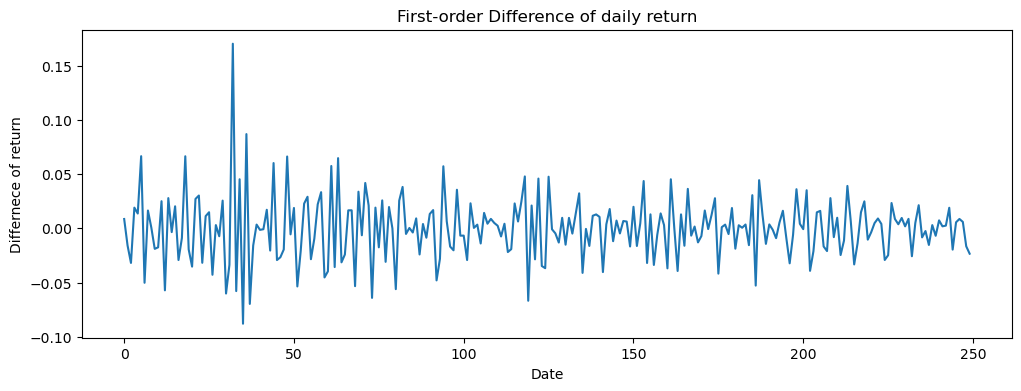

In [16]:
first_difference_return = np.diff(y)
plt.figure(figsize=(12, 4))
plt.plot(first_difference_return)
plt.title('First-order Difference of daily return')
plt.xlabel('Date')
plt.ylabel('Differnece of return')

In [17]:
first_difference_return

array([ 8.63801655e-03, -1.58845382e-02, -3.19040842e-02,  1.91229404e-02,
        1.36852274e-02,  6.66260375e-02, -5.02500148e-02,  1.64564612e-02,
        6.06638371e-04, -1.89309138e-02, -1.75114391e-02,  2.50689195e-02,
       -5.72093422e-02,  2.79202107e-02, -3.46098124e-03,  2.03579978e-02,
       -2.92275679e-02, -8.86838611e-03,  6.65444841e-02, -1.94593075e-02,
       -3.53088580e-02,  2.71407347e-02,  3.03067157e-02, -3.17940697e-02,
        1.12886642e-02,  1.48799784e-02, -4.28462824e-02,  3.03091529e-03,
       -7.30686338e-03,  2.56074124e-02, -6.01589602e-02, -3.36310904e-02,
        1.70440769e-01, -5.79129901e-02,  4.53229441e-02, -8.80352489e-02,
        8.70141445e-02, -6.97496644e-02, -1.58153413e-02,  3.47103648e-03,
       -1.38935796e-03, -8.07705462e-04,  1.71440189e-02, -2.04967674e-02,
        6.02821745e-02, -2.92553000e-02, -2.66802324e-02, -1.95205804e-02,
        6.63355594e-02, -5.52064436e-03,  1.88258802e-02, -5.36178591e-02,
       -2.06541672e-02,  

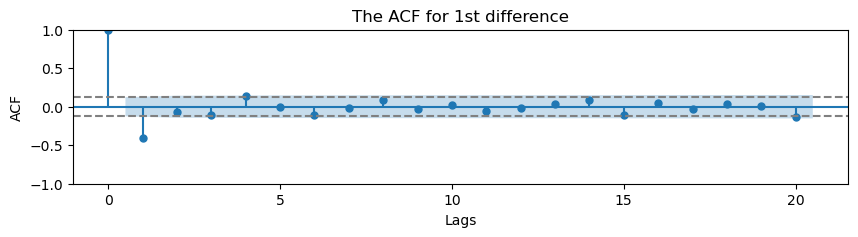

In [18]:
acf_vals = acf(first_difference_return, nlags=20)
fig, ax = plt.subplots(figsize=(10, 2))
plot_acf(first_difference_return, ax=ax, lags=20, alpha=0.05)
ax.axhline(y=-1.96/np.sqrt(len(first_difference_return)), linestyle='--', color='gray')
ax.axhline(y=1.96/np.sqrt(len(first_difference_return)), linestyle='--', color='gray')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')
plt.title("The ACF for 1st difference")
plt.show()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


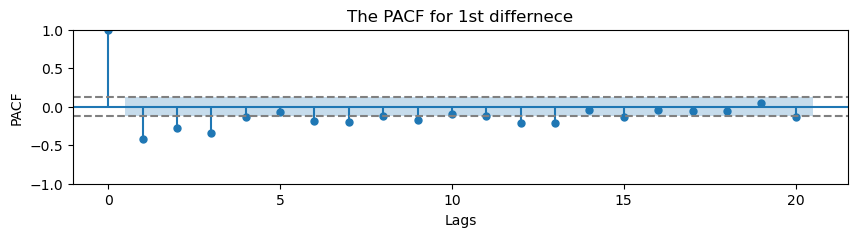

In [19]:
pacf_vals = pacf(first_difference_return, nlags=20)
fig, ax = plt.subplots(figsize=(10, 2))
plot_pacf(first_difference_return, ax=ax, lags=20, alpha=0.05)
ax.axhline(y=-1.96/np.sqrt(len(first_difference_return)), linestyle='--', color='gray')
ax.axhline(y=1.96/np.sqrt(len(first_difference_return)), linestyle='--', color='gray')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')
plt.title("The PACF for 1st differnece")
plt.show()

**MA term:1 or 2, AR term:0 or 4**

In [20]:
model = sm.tsa.ARIMA(first_difference_return, order=(3,0,1))
result = model.fit()
aic = result.aic
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 598.053
Date:                Thu, 21 Sep 2023   AIC                          -1184.105
Time:                        13:48:36   BIC                          -1162.976
Sample:                             0   HQIC                         -1175.601
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.209e-05   5.43e-05     -0.223      0.824      -0.000    9.43e-05
ar.L1          0.1603      0.052      3.103      0.002       0.059       0.262
ar.L2         -0.1477      0.046     -3.192      0.0

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1053.904, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1098.379, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1116.901, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1144.733, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1142.737, Time=0.03 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 0.431 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(3, 0, 0)   Log Likelihood                 576.366
Date:                Thu, 21 Sep 2023   AIC                          -1144.733
Time:                        13:50:09   BIC   

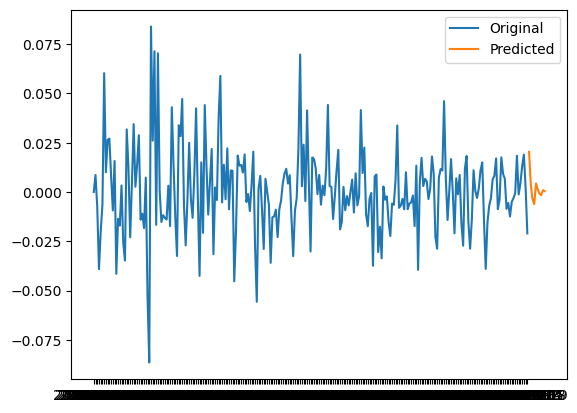

array([ 0.02032469,  0.00361776, -0.00377264, -0.00614669,  0.00438071,
        0.00135715, -0.0008031 , -0.00159757,  0.0009163 ,  0.0004325 ])

In [24]:
model = auto_arima(first_difference_return, start_p=0, start_q=0,
                   test='adf',       # 使用 adftest 来找到最佳的 'd'
                   max_p=3, max_q=3, # 最大的 p 和 q
                   m=1,              # 频率为1，因为这是一个非季节性时间序列
                   d=None,           # 让模型找到 'd'
                   seasonal=False,   # 无季节性
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

# 输出最佳 ARIMA 模型的参数
print(model.summary())

# 使用 ARIMA 模型进行预测
y_pred = model.predict(n_periods=10)  # 预测未来10个时间点
x_hat = np.arange(len(x),len(x) + 10)
# 绘制原始数据和预测
plt.plot(x, y, label='Original')
plt.plot(x_hat, y_pred, label='Predicted')
plt.legend()
plt.show()
y_pred


In [25]:
model = arch_model(first_difference_return, vol='GARCH', p=1, q=2)
results = model.fit()

lm_test = results.arch_lm_test()
print(lm_test)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 1084776.1490500057
Iteration:      2,   Func. Count:     19,   Neg. LLF: 203.94478801499605
Iteration:      3,   Func. Count:     30,   Neg. LLF: -495.878549355711
Iteration:      4,   Func. Count:     38,   Neg. LLF: -425.28847210984605
Iteration:      5,   Func. Count:     46,   Neg. LLF: -520.6480045101969
Iteration:      6,   Func. Count:     53,   Neg. LLF: -549.4777683131924
Iteration:      7,   Func. Count:     59,   Neg. LLF: -516.5478159990666
Iteration:      8,   Func. Count:     66,   Neg. LLF: -541.3488714742523
Iteration:      9,   Func. Count:     73,   Neg. LLF: -544.1293639808382
Iteration:     10,   Func. Count:     80,   Neg. LLF: -550.0101177665667
Iteration:     11,   Func. Count:     86,   Neg. LLF: -549.9531543903013
Iteration:     12,   Func. Count:     93,   Neg. LLF: -550.0576904840643
Iteration:     13,   Func. Count:     99,   Neg. LLF: -550.0747009302671
Iteration:     14,   Func. Count:    105,   Neg. LL

/Users/apple/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008575. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [35]:
model = arch_model(first_difference_return, vol='Garch', p=1, q=1)

results = model.fit(update_freq=5)

forecasts = results.forecast(start=0)
cond_var = forecasts.variance.iloc[-1]
cond_var*252

Optimization terminated successfully    (Exit mode 0)
            Current function value: -549.1769612122457
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2


/Users/apple/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008575. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/apple/anaconda3/lib/python3.10/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


h.1    0.118527
Name: 249, dtype: float64

# Exante volatility

In [31]:
# exponentially daily weighted moving average return
n = len(first_difference_return)
delta = 0.94 #centerlized result

weighted_moving_average_return = 0
for i in range(n):
    weighted_moving_average_return += (1 - delta)*(delta**(n - i))*first_difference_return[i]
weighted_moving_average_return


-0.0012833076565291815

In [41]:
# exponentially daily weighted moving average volatility
weighted_moving_average_volatility = 0
for i in range(n):
    weighted_moving_average_volatility += (1 - delta)*(delta**(n - i))*(daily_return[i] - weighted_moving_average_return)**2
weighted_moving_average_volatility*252

0.03844262984932111

# Rough volatility


In [51]:
Return = [0.12,0.134,0.12]
beta = [[1,1,1],[1,3,2],[0.5,0.2,-0.5]]



np.dot(Return,np.linalg.inv(beta))

array([0.10764706, 0.00823529, 0.00823529])